In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb


#import model packages
from sklearn.ensemble import GradientBoostingRegressor  # gradient boost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# linear regression
# SVM
# decision tree
# random forest


In [19]:
# read dataset for each feature selection method
data = {}
above = '../../../'
feature_selection_method = ['PCmd', 'decision', 'selectKbest']  # ADD TARGET VARIABLE TO DATASETS

for dataset in feature_selection_method:
    data[dataset] = pd.read_pickle(above + 'd_{}.pkl'.format(dataset))
    
y_col = 's_sale_price'

In [20]:
def trainTest(dat, pct):
    '''
    Randomly splits data into train and test
    '''
    dat_shuf = dat.reindex(np.random.permutation(dat.index))
    trn = dat_shuf[:int(np.floor(dat_shuf.shape[0]*pct))]
    tst = dat_shuf[int(np.floor(dat_shuf.shape[0]*pct)):]
    return [trn, tst]

In [21]:
def modBootstrapper(train, test, nruns, sampsize, model):
    
    accuracy_scores = []
    mae_scores = []
    mse_scores = []
    for i in range(nruns):
        train_samp = train.iloc[np.random.randint(0, len(train), size=sampsize),]
        Y_train = train_samp[y_col]
        X_train = train_samp.drop(y_col, 1)
        Y_test = test[y_col]
        X_test = test.drop(y_col, 1)
        
        if model == 'gradient_boost':
            model = GradientBoostingRegressor()
        elif model == 'linear_regression':
            model = LinearRegression()
        elif model == 'ridge':
            model = Ridge()
        elif model == 'lasso':
            model =  Lasso()
        elif model == 'elastic_net':
            model =  ElasticNet()
        elif model == 'xgboost':
            model = XGBRegressor()
        
        model.fit(X_train, Y_train)
        preds = model.predict(X_test)
        #scores = model.predict_proba(X_test)[:, 1]
        accuracy = metrics.r2_score(Y_test, preds)
        mae = metrics.mean_absolute_error(Y_test, preds)
        mse = metrics.mean_squared_error(Y_test, preds)
        
        print(model, samplesize, accuracy)
        accuracy_scores.append(accuracy)
        mae_scores.append(mae)
        mse_scores.append(mse)
        
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.sqrt(np.var(accuracy_scores, ddof=1))
    mean_mae = np.mean(mae_scores)
    std_mae = np.sqrt(np.var(mae_scores, ddof=1))
    mean_mse = np.mean(mse_scores)
    std_mse = np.sqrt(np.var(mse_scores, ddof=1))
        
    return mean_accuracy, std_accuracy, mean_mae, std_mae, mean_mse, std_mse

In [22]:
# test/train split
train_pct = 0.8
data_train = {}
data_test = {}

for dataset in feature_selection_method:
    data_train[dataset], data_test[dataset] = trainTest(data[dataset], train_pct)

In [23]:
# empirically test sample sizes
samplesizes = [100, 500, 2500, 5000, 10000, 15000, 20000]
nbootstraps = 20

# populate for models to be tested
models_list = ['gradient_boost', 'linear_regression', 'ridge', 'lasso', 'elastic_net', 'xgboost']  # ADD MORE MODELS

# initialize dictionary 
results = {} 
# iterating through the elements of list
for dataset in feature_selection_method:
    results[dataset] = {}
    for model in models_list: 
        results[dataset][model] = {}
    
for dataset in feature_selection_method:
    for model in models_list:
        for samplesize in samplesizes:
            results[dataset][model][samplesize] = modBootstrapper(data_train[dataset], data_test[dataset], nbootstraps, samplesize, model)

GradientBoostingRegressor() 100 0.41475764925708813
GradientBoostingRegressor() 100 0.14271788524280704
GradientBoostingRegressor() 100 0.1973696768710127
GradientBoostingRegressor() 100 0.35181824156661423
GradientBoostingRegressor() 100 0.23127222883902498
GradientBoostingRegressor() 100 0.06409946858574955
GradientBoostingRegressor() 100 0.22886367174373934
GradientBoostingRegressor() 100 -1.4362305958618085
GradientBoostingRegressor() 100 0.42171848421811187
GradientBoostingRegressor() 100 0.14301844467683866
GradientBoostingRegressor() 100 -0.4341287016203925
GradientBoostingRegressor() 100 0.31765654803105225
GradientBoostingRegressor() 100 0.33666696743574365
GradientBoostingRegressor() 100 0.12894002709304508
GradientBoostingRegressor() 100 -0.2042196132301335
GradientBoostingRegressor() 100 0.2809315621450973
GradientBoostingRegressor() 100 0.2336392063685424
GradientBoostingRegressor() 100 0.12349197943045165
GradientBoostingRegressor() 100 -0.35185938095689995
GradientBoosti

LinearRegression() 500 0.3873475950383152
LinearRegression() 500 0.5027401387155217
LinearRegression() 500 -0.21208198829806024
LinearRegression() 500 0.4738873969619284
LinearRegression() 500 0.4547221251187413
LinearRegression() 500 0.07219933918154131
LinearRegression() 500 0.5052503143986649
LinearRegression() 500 0.5016219929509373
LinearRegression() 500 0.44477723631237753
LinearRegression() 500 0.4908491133106887
LinearRegression() 500 0.034207676111154606
LinearRegression() 500 0.47641061124610207
LinearRegression() 500 0.11466822338805527
LinearRegression() 500 0.5242190936801145
LinearRegression() 500 0.2581141668486392
LinearRegression() 500 -0.15929090598191098
LinearRegression() 500 0.5083331879627485
LinearRegression() 2500 0.4784708679546692
LinearRegression() 2500 0.49578491520267776
LinearRegression() 2500 0.5100478701438864
LinearRegression() 2500 0.5151825745809488
LinearRegression() 2500 0.5417173555170898
LinearRegression() 2500 0.540968113503554
LinearRegression()

Ridge() 10000 0.5547353486084945
Ridge() 15000 0.5532779125921949
Ridge() 15000 0.5571128529758972
Ridge() 15000 0.5318827078460658
Ridge() 15000 0.5571097273184175
Ridge() 15000 0.549008961755965
Ridge() 15000 0.5570908436489956
Ridge() 15000 0.5525505424383885
Ridge() 15000 0.5475246760415847
Ridge() 15000 0.5532455502552942
Ridge() 15000 0.5588775968711256
Ridge() 15000 0.5567236697203004
Ridge() 15000 0.5546054879335058
Ridge() 15000 0.5556466090975678
Ridge() 15000 0.5568364925482738
Ridge() 15000 0.5456778126927481
Ridge() 15000 0.5441016647128428
Ridge() 15000 0.544773985701839
Ridge() 15000 0.5546682430175739
Ridge() 15000 0.5576919651179895
Ridge() 15000 0.5579509428793339
Ridge() 20000 0.5569942555679218
Ridge() 20000 0.551712559331427
Ridge() 20000 0.5582685152577203
Ridge() 20000 0.5575819998367622
Ridge() 20000 0.552082206084325
Ridge() 20000 0.5567812071524001
Ridge() 20000 0.5548403982325105
Ridge() 20000 0.5525261662521581
Ridge() 20000 0.5589182933787041
Ridge() 20000 

/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6213257341706.728, tolerance: 7063887282.970275
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8085603514900.55, tolerance: 9985885098.449045
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4302942128325.696, tolerance: 6109599535.505099
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/m

Lasso() 100 0.26714166311620735
Lasso() 100 0.30012217825981
Lasso() 100 0.4593712810881193
Lasso() 100 0.09537031029073473
Lasso() 100 0.08425499347666388
Lasso() 100 -0.029629710245878238
Lasso() 100 -0.055159950096967725


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3994189214589.534, tolerance: 3125986678.5288167
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1171212266795.6946, tolerance: 15085698744.698498
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11552877530743.654, tolerance: 12637948338.588572
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/

Lasso() 100 0.4161041764065343
Lasso() 100 0.19038419023315212
Lasso() 100 -1.0248533152991315
Lasso() 100 -0.6016099375351662
Lasso() 100 -1.2785279635435023
Lasso() 100 0.3645341233102489
Lasso() 100 0.2890416794130629
Lasso() 500 0.4866091898526598


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49677982125271.22, tolerance: 146074332740.7008
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9631830562671.092, tolerance: 13748590053.55306
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16084561399011.367, tolerance: 61037668330.851074
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/env

Lasso() 500 0.46724711743885905
Lasso() 500 0.49794537263244787
Lasso() 500 0.5194508522649305
Lasso() 500 0.5249077350694062
Lasso() 500 0.5076180986429624
Lasso() 500 0.44187305715767045


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69916937511057.85, tolerance: 68542933908.9562
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46438939139208.08, tolerance: 30807754078.58658
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67893166644016.61, tolerance: 63007159703.78808
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/m

Lasso() 500 0.14583454917029492
Lasso() 500 0.5033602945906941
Lasso() 500 0.5384594151629465
Lasso() 500 0.5212117891133219
Lasso() 500 0.4341845865873394
Lasso() 500 0.031830081447627
Lasso() 500 0.4133443433513988


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65177958013885.14, tolerance: 27193481219.66021
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57058103856477.56, tolerance: 48725407901.38062
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343476699247032.6, tolerance: 121082750696.04408
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs

Lasso() 500 0.5165609456865419
Lasso() 500 0.5017784103643792
Lasso() 500 0.5303000076583091
Lasso() 500 0.47743842412227155
Lasso() 500 0.5244390309225562
Lasso() 500 0.4845841850296482


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38151494239233.75, tolerance: 20516132758.80298
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113087550686570.67, tolerance: 94082981275.81395
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62344603684385.6, tolerance: 48357180171.83863
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/

Lasso() 2500 0.5423137689680829
Lasso() 2500 0.5540396613053298


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 851566508195758.1, tolerance: 481924429832.809
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1657280116770219.5, tolerance: 598219046106.4662
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5432327920627116
Lasso() 2500 0.5227175714650838


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1496510013760173.0, tolerance: 665088939229.16
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1032503892646658.8, tolerance: 401614778680.8138
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5212598615721376
Lasso() 2500 0.49903983966495136


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581554043698046.4, tolerance: 431670458252.154
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460928949919480.2, tolerance: 474215078525.659
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5388671090906458
Lasso() 2500 0.5186789146820723


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111527865479833.5, tolerance: 438251572038.50854
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1600032808110912.2, tolerance: 756579716874.3794
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5129254485766669
Lasso() 2500 0.47949420289699385


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 958509070641405.5, tolerance: 531768609587.7893
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2007267201879228.8, tolerance: 656780403154.2709
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5291302652171694
Lasso() 2500 0.4904521200708625


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507837966195681.8, tolerance: 275460465367.2101
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 772687335963147.1, tolerance: 303946096578.04
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.552801728813929
Lasso() 2500 0.5510117180624273


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783424895915127.6, tolerance: 371810966702.9978
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586156741145984.8, tolerance: 324354773710.8686
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5494039480168872
Lasso() 2500 0.549104382717629


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563935831959244.9, tolerance: 332008589412.069
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 637477404541837.8, tolerance: 332621519537.2876
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5442442232447224
Lasso() 2500 0.5420618508542152


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801407424651026.8, tolerance: 370609643703.5283
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810844399214892.6, tolerance: 469791558005.7555
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5490345010312612
Lasso() 2500 0.48414045702639674


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1907661161337038.8, tolerance: 1008326261300.3705
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4984965719464155


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3029272270636423.0, tolerance: 980723648784.1252
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5449235323724667


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1834198448928811.8, tolerance: 708815231138.8185
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5510111160051059


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789596770950901.0, tolerance: 695759465977.104
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5428178720380732


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3107450664141266.0, tolerance: 1124575449023.4954
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5497019376097305


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2407058712103623.0, tolerance: 1058378802264.3875
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.537125945567752


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1529209840976899.2, tolerance: 623564237895.0109
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5543068099508504


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1796642941070872.8, tolerance: 983618366104.843
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.528011705705792


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1979799297962709.5, tolerance: 932607045336.8838
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5531018715356799


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1984465984758409.2, tolerance: 864823755629.086
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5510589563529006


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2141558967491881.8, tolerance: 911740742044.8928
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5384581929525352


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2767475831207005.5, tolerance: 925457162587.2831
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5241867983639455


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2010927104925009.0, tolerance: 721643822240.9977
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5409154912552335


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2138786293691759.5, tolerance: 1063968155129.474
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5153787747484513


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946312236278520.2, tolerance: 951378729276.0564
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5562086814249272


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1905449530988718.0, tolerance: 1162609909540.909
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5185737611736347


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2588219519677227.0, tolerance: 760189921420.2086
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4820033122984476


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1588260545373837.5, tolerance: 1121867909728.9136
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5489981598425371


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279630882973261.0, tolerance: 558415342650.1603
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5474682788519022


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2611442476114189.5, tolerance: 1003952949821.5867
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5290574560201657


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5467333281676916.0, tolerance: 1865372413783.7273
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5425614405450219


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4237529621509602.0, tolerance: 1826421993497.59
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5542761331651602


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3808733540339501.0, tolerance: 1658972897744.645
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5547643872851411


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5955709307977024.0, tolerance: 2379904472502.4575
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5533062738706216


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4235382684178226.0, tolerance: 2001091559019.2544
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5514578266217798


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2604719345256065.5, tolerance: 1432562805358.639
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5577778671004996


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2954767840313219.0, tolerance: 1472240297586.1245
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.552059365099014


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4622965138037983.0, tolerance: 1785746508919.2964
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5538045704995382


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4721501541390084.0, tolerance: 1877957373962.3044
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5523726970046144


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4635025606929249.0, tolerance: 2031681286637.2122
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5525373346035347


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3913363899667814.5, tolerance: 1925951177053.6296
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5440382765966792


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703887899931686.0, tolerance: 1949208062296.5325
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5501944275037489


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4577909952799749.0, tolerance: 2040439734713.3208
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5557716844005055


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3924184305191258.5, tolerance: 1539044585918.5105
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5555080910822072


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5487609010550177.0, tolerance: 1909739767908.2754
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5563560136522461


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4019527135854684.0, tolerance: 1712428918324.7239
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5455191305785887


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4541651195604717.0, tolerance: 1951173825004.6433
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5467938324596519


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3912717453655769.0, tolerance: 1610120354926.71
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5531823734313589


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6891445582752424.0, tolerance: 2238394409046.6113
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5473007911893154


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3775135682349694.5, tolerance: 1881379419394.0542
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5143002725997021


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5446973860243682.0, tolerance: 2492183403510.679
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5558387885129588


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7339141945016668.0, tolerance: 3571650720760.304
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5496518808229482


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8812176910177041.0, tolerance: 3828986027588.4307
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5455664652558585


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6936011455717241.0, tolerance: 3041828282834.274
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5572642082052439


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6005015728664613.0, tolerance: 2736766335473.3237
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5581847119310199


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5713004960795291.0, tolerance: 2437884746148.358
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5394218714963652


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6881268085443214.0, tolerance: 2619197463524.71
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5533544954887686


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6527060889440688.0, tolerance: 3441331650670.3027
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5283703767384376


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8952635791171080.0, tolerance: 3400409910795.1943
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5496542872523359


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7353052204996558.0, tolerance: 3061895345410.044
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5406349337609404


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4576760355742407.0, tolerance: 2511516096977.725
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5574977621460864


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5226474936268769.0, tolerance: 2740198333158.274
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5582823850414648


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8374823463632428.0, tolerance: 3284473137775.8228
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.543531487881742


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5907037169650727.0, tolerance: 2915020753633.297
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5558693281709324


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5070387776254190.0, tolerance: 2127888412417.7102
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5589453641736786


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6497430831691916.0, tolerance: 2719972985925.084
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5567529221191523


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5292785765123654.0, tolerance: 2446667244752.352
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5348472062099183


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4489097559447574.0, tolerance: 2251164136593.214
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5594324637026952


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5490343408085226.0, tolerance: 2678127462380.404
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5559406133567826


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6526855993018021.0, tolerance: 2579939621605.2554
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5572415792791943


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7331218330903469.0, tolerance: 3435370096362.3716
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5494832381946564


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9021430017540202.0, tolerance: 4207435056296.2715
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5566021946891546


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8557878839469813.0, tolerance: 3655954608757.4956
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.556385658918614


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7982683849221006.0, tolerance: 3893104295906.506
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5484607510467551


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8943988583524427.0, tolerance: 3352926296032.221
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5588848621995315


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1233697792131804e+16, tolerance: 4071837596786.4976
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5531480308218972


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8216393554978075.0, tolerance: 4040348776505.2627
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5544552222630896


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8330019588868516.0, tolerance: 4154585042318.9756
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5567573133161041


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9065394072705122.0, tolerance: 3582913299238.7334
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5557595494395494


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7636493587378667.0, tolerance: 3617869570220.248
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5555106728329768


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7955710170679852.0, tolerance: 3634801957660.53
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5592297823227916


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7754866023307245.0, tolerance: 3476709693501.607
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5545590335148056


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.112501520937135e+16, tolerance: 3906160412508.0195
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5519480567310883


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8036880825838012.0, tolerance: 3726661927429.3906
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5572215841278421


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8515751660698282.0, tolerance: 3492241011001.5977
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5569866736809485


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8033018295941450.0, tolerance: 3737940460129.9424
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5578614862995159


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.085853866299962e+16, tolerance: 4285953129472.0776
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5546254250954628


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9337042237936562.0, tolerance: 3809410030003.858
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5548060317499455


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6556636033107676.0, tolerance: 3199573194452.776
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5596877220637395


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6778064478572032.0, tolerance: 3292146266387.781
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61831065366.29541, tolerance: 29309774475.853497
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5572852610092645
ElasticNet() 100 -0.06457679671884464
ElasticNet() 100 0.41562943006221975
ElasticNet() 100 0.4101320375278086
ElasticNet() 100 0.4981094109333458
ElasticNet() 100 -0.29387411651792705
ElasticNet() 100 0.10302120611956656
ElasticNet() 100 0.5137329947031954
ElasticNet() 100 -0.07855983591367988
ElasticNet() 100 0.3852146910481916
ElasticNet() 100 0.08219565702788545
ElasticNet() 100 0.5213524949231545
ElasticNet() 100 0.4361689865320848
ElasticNet() 100 0.3741181741350559
ElasticNet() 100 -2.2347425615756347
ElasticNet() 100 0.38669547459807785
ElasticNet() 100 0.4352524898570359
ElasticNet() 100 0.05907819307444517
ElasticNet() 100 -0.285221737192235
ElasticNet() 100 0.49727291528993267
ElasticNet() 100 0.4582699588614362
ElasticNet() 500 0.35787147647313255
ElasticNet() 500 0.09444538108249856
ElasticNet() 500 -0.18429567704660554
ElasticNet() 500 0.44823753539259403
ElasticNet() 500 0.5300226380956627
ElasticNet() 500 0.5395447032596746
ElasticNet() 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 100 -0.028258661877871516
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paral

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 500 0.4811857401170976
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 500 0.49354119375234273
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 2500 0.5949382590248845
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 5000 0.6246122229670776
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 5000 0.3572406867424506
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 10000 0.6504904872923513
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 15000 0.7193918551844605
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 15000 0.7233089968988153
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 20000 0.707630585431959
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

GradientBoostingRegressor() 5000 0.6696725961609027
GradientBoostingRegressor() 5000 0.46235668691920273
GradientBoostingRegressor() 5000 0.6495095826058217
GradientBoostingRegressor() 5000 0.6601274763133071
GradientBoostingRegressor() 5000 0.6360158737666253
GradientBoostingRegressor() 5000 0.5831611492090245
GradientBoostingRegressor() 5000 0.6253639306678116
GradientBoostingRegressor() 5000 0.6538182131137962
GradientBoostingRegressor() 5000 0.6413706387880385
GradientBoostingRegressor() 5000 0.6620108374925185
GradientBoostingRegressor() 5000 0.5810696114889865
GradientBoostingRegressor() 5000 0.6021180068571241
GradientBoostingRegressor() 5000 0.7039015070608002
GradientBoostingRegressor() 5000 0.6712548564876875
GradientBoostingRegressor() 10000 0.6813806605353433
GradientBoostingRegressor() 10000 0.7012635750568635
GradientBoostingRegressor() 10000 0.6669186599347892
GradientBoostingRegressor() 10000 0.6567205289017854
GradientBoostingRegressor() 10000 0.6728209443414453
Gradie

LinearRegression() 15000 0.5371191573989218
LinearRegression() 15000 0.5303449838546173
LinearRegression() 15000 0.5297678856251664
LinearRegression() 15000 0.5308934970028025
LinearRegression() 15000 0.5229401932725618
LinearRegression() 15000 0.5370132353854946
LinearRegression() 15000 0.5318897806920027
LinearRegression() 15000 0.5313662674884669
LinearRegression() 15000 0.5352832055860715
LinearRegression() 15000 0.5275345029831555
LinearRegression() 15000 0.5358888478068002
LinearRegression() 15000 0.5352179509250834
LinearRegression() 15000 0.5360814939290955
LinearRegression() 15000 0.5253613064306992
LinearRegression() 15000 0.5339149929532111
LinearRegression() 15000 0.5353707489255177
LinearRegression() 15000 0.5225461699545408
LinearRegression() 15000 0.5367511550700221
LinearRegression() 20000 0.5355578467316569
LinearRegression() 20000 0.5335717497361405
LinearRegression() 20000 0.5141282247984358
LinearRegression() 20000 0.5359728620721393
LinearRegression() 20000 0.53646

/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.35387e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.5137519333465447
Ridge() 10000 0.5307144081763013
Ridge() 10000 0.5283650237007165
Ridge() 10000 0.5300824586504254
Ridge() 10000 0.5341204480957662
Ridge() 10000 0.5334888293763762
Ridge() 10000 0.528571073745425
Ridge() 10000 0.5283382633634328
Ridge() 10000 0.5193105562473781
Ridge() 10000 0.5344937970104966
Ridge() 10000 0.5230350051535311
Ridge() 10000 0.5291415050108896
Ridge() 10000 0.5327944081629443


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10092e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.5287397384933938
Ridge() 10000 0.5325422112746648
Ridge() 10000 0.5335115660197103
Ridge() 10000 0.532876605293993
Ridge() 10000 0.5300695566606066
Ridge() 15000 0.5331136001164731


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.41353e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.54144e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07848e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72583e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packa

Ridge() 15000 0.5365366459403001
Ridge() 15000 0.5306708450648312
Ridge() 15000 0.5330851525711631
Ridge() 15000 0.5335706921282046
Ridge() 15000 0.5343701180513727
Ridge() 15000 0.5116835100895943


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.21394e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.69779e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.98679e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.6107e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packag

Ridge() 15000 0.5328334061552127
Ridge() 15000 0.5317422071219478
Ridge() 15000 0.5349403361716332
Ridge() 15000 0.529880860321787
Ridge() 15000 0.5278670429229337
Ridge() 15000 0.5344868108881169


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.41695e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.40457e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.73635e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.05402e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packa

Ridge() 15000 0.5141494732570678
Ridge() 15000 0.531343858758706
Ridge() 15000 0.5349563906409877
Ridge() 15000 0.5356648723977319
Ridge() 15000 0.5183959618423833
Ridge() 15000 0.5356233496116845


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.37425e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.79925e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.9522e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.92149e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packag

Ridge() 15000 0.5275613021660159
Ridge() 20000 0.5234628851575343
Ridge() 20000 0.5262432182339083
Ridge() 20000 0.5312988078027243
Ridge() 20000 0.530229852850366
Ridge() 20000 0.5241774781275597


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.60261e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.23605e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.42545e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.21377e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packa

Ridge() 20000 0.5352729876338147
Ridge() 20000 0.5368627224623304
Ridge() 20000 0.537350654115391
Ridge() 20000 0.5286161382231646
Ridge() 20000 0.5298664040170658
Ridge() 20000 0.5343414152907222


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.90052e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49716e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57551e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.13513e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packa

Ridge() 20000 0.5351240947119575
Ridge() 20000 0.5331697271713163
Ridge() 20000 0.5314148874265794
Ridge() 20000 0.5290170302581207
Ridge() 20000 0.5281829842534893
Ridge() 20000 0.5298700212998493


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.42773e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.24086e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.56109e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.71931e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packa

Ridge() 20000 0.5350575759220366
Ridge() 20000 0.5348943508956618
Ridge() 20000 0.5348517613965543
Lasso() 100 0.3616779265031712
Lasso() 100 0.465117350877414
Lasso() 100 -3.029612011055856
Lasso() 100 0.35820993470005325
Lasso() 100 -1.2524438474308912
Lasso() 100 -7.174636533331345


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182787427847162.97, tolerance: 88806000870.71944
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20014824075477.098, tolerance: 17367159540.71432
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5480921402795.256, tolerance: 47995711141.2556
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs

Lasso() 100 -1.1590632546419144
Lasso() 100 0.366300426765918
Lasso() 100 -0.5736028537330387
Lasso() 100 -0.8549123246572585
Lasso() 100 0.36653214305886184
Lasso() 100 -1.119672215579977
Lasso() 100 0.46796663493636503
Lasso() 100 0.4476477779748361
Lasso() 100 0.4634811153559484


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2644256376489.8975, tolerance: 4438109531.665939
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3496872697276.4043, tolerance: 3635119361.0627003
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11769197660881.057, tolerance: 12761045015.52646
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/e

Lasso() 100 0.4217620223155183
Lasso() 100 -0.09679034420650545
Lasso() 100 0.43228641232342935
Lasso() 100 0.35736677386492854
Lasso() 100 0.0013970812957062595
Lasso() 500 0.48347331536097427
Lasso() 500 0.47621686130255103
Lasso() 500 0.49521409820051787


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46889035964138.19, tolerance: 23796199797.976803
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71018385811520.95, tolerance: 80200029031.36127
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188246106209583.47, tolerance: 120254293433.8394
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/env

Lasso() 500 0.4078921601343155
Lasso() 500 0.23351364317369505
Lasso() 500 0.49086154936143933
Lasso() 500 0.45415361150960176
Lasso() 500 0.5212355077555282
Lasso() 500 0.5068490344212009


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50147686580244.19, tolerance: 36567553434.75918
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214904052529958.34, tolerance: 146204886374.0192
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220603547803486.7, tolerance: 142085319981.43976
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/env

Lasso() 500 0.31521274603164884
Lasso() 500 0.4489630561127219
Lasso() 500 0.46995477990392
Lasso() 500 0.44037976004515744
Lasso() 500 0.500542848656681
Lasso() 500 0.4406394420586167
Lasso() 500 0.4649850431371575


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41632375722875.28, tolerance: 33061705629.06338
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71499889004107.52, tolerance: 43746271424.70193
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72793939741700.23, tolerance: 48500836878.75639
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/

Lasso() 500 0.4574086723491988
Lasso() 500 0.48719189046222533
Lasso() 500 -0.1203490894114363
Lasso() 500 0.4919800930985271


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494747630972645.56, tolerance: 274520371794.32703
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783844752246675.9, tolerance: 315697400468.69464
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4828995666370315
Lasso() 2500 0.527374185065707


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639272091867888.2, tolerance: 505912369966.52563
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1280803243591176.5, tolerance: 452245951040.5882
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5315189426965328
Lasso() 2500 0.44664871820254437


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715280083477355.4, tolerance: 455192962084.59784
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632848140330928.5, tolerance: 356498988053.4789
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4493094229140655
Lasso() 2500 0.5301315815870384


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1161960715757429.2, tolerance: 542668414455.6767
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5187535970711705


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1247794176952406.2, tolerance: 458622141651.61945
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5136069176563753


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582102750137883.1, tolerance: 402972452846.1264
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5310011434552488


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678207397386445.9, tolerance: 330823609099.58124
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 796540924302225.4, tolerance: 385069412706.5186
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5106467606204859
Lasso() 2500 0.4860460076057933


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151669345626896.2, tolerance: 585407997650.9409
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1247206359148033.0, tolerance: 413725413495.65375
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4656215119077196
Lasso() 2500 0.5139822257136695


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268000083726056.5, tolerance: 861482687664.2078
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755061042923833.4, tolerance: 422113071644.0509
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5168331985467994
Lasso() 2500 0.5236634364643246


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882671516701875.2, tolerance: 434786396868.358
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1637058235927593.0, tolerance: 534277378873.8228
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.41362233694357753
Lasso() 2500 0.5178826658217102


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833945245366909.2, tolerance: 584541152337.4302
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805678060152492.8, tolerance: 370630956310.0207
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4841345345013076
Lasso() 2500 0.5254282829806276


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1082604948096714.4, tolerance: 456649432981.706
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4954489760492603


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096595575684977.8, tolerance: 621438193156.4435
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5289342765778291


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1403035501877187.0, tolerance: 768953422924.1216
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5248105821128313


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1366914094005863.2, tolerance: 686447303924.1671
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.514956687767677


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3954602493904250.0, tolerance: 1495608141418.0706
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5244837107708942


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1451118213071666.0, tolerance: 847863947273.0585
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5327173071039548


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2995974198432384.5, tolerance: 1460744324870.752
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5150911161709619


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1853955208606459.8, tolerance: 722994704633.2941
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5327192835811285


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2325379737120642.5, tolerance: 932973062251.79
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5231349149209163


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2105029833724188.8, tolerance: 1008492704502.2301
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4719876848950191


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2375209719150408.5, tolerance: 1102183894919.101
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5092945905838366


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2950669497854068.0, tolerance: 998535128846.9861
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5187977086362863


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1277965166916007.5, tolerance: 591812301870.2717
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5330081075854443


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2476280201545424.5, tolerance: 1066758781345.8157
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5305025418639877


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2850854850777866.0, tolerance: 1062476591236.4489
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5243854197946733


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209230250839470.0, tolerance: 813372892612.2334
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5288009737811493


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1622240126798961.0, tolerance: 698770256218.2853
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5269239157004668


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2137701627993801.2, tolerance: 747881555851.391
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5291694333947123


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1498384146380099.5, tolerance: 716270408589.9933
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5323101807450952


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1887997298352026.5, tolerance: 716981926624.4022
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5288024491613603


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1504355345929860.5, tolerance: 847815492995.709
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.531565762868811


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4043059320354987.5, tolerance: 1817761221356.703
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5298672139914915


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5036547111482958.0, tolerance: 2082660230019.9314
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5355627514420449


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5213225842271423.0, tolerance: 2112806726541.0742
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5025853179116329


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5606371473775107.0, tolerance: 2779080305756.0874
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5080527166888792


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5106498503748005.0, tolerance: 2015920901039.2842
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5249801577661564


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4417095013804204.0, tolerance: 1732848773174.453
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.536150276649531


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5780428724469473.0, tolerance: 2484547576434.992
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5311191668738764


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3272830979783340.0, tolerance: 1482711976038.2598
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5330254962229626


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4445332989523789.5, tolerance: 1854776278795.2769
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5355592558635561


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4598098649983966.0, tolerance: 1941546953808.208
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5346404463010261


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3344211506037789.5, tolerance: 1512530790625.9766
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5340567050780813


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3134314654662527.5, tolerance: 1363490348623.1145
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5330498058076494


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3225459083070539.0, tolerance: 1432188140784.963
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5277386231912219


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4393387890043763.5, tolerance: 1937716974311.6426
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5343156375878703


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3325754793240000.5, tolerance: 1738131918138.6309
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.536123898358464


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3850409710980123.0, tolerance: 1876692168518.377
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5124352987969676


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4732570231363169.0, tolerance: 1996799543265.0105
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5348236254301565


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2713417152891865.5, tolerance: 1324911357487.918
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5351782017286142


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4515949539304665.0, tolerance: 1764771356474.512
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5182530641962038


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770619813083221.0, tolerance: 1464682570020.295
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5322731217064144


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4766385831731932.0, tolerance: 2252595042220.0903
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5286243760805918


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6980464227604427.0, tolerance: 2918474258450.7324
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5332632818188311


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7668101127900439.0, tolerance: 3094517107322.445
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5323936482363946


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6571138825794175.0, tolerance: 2807266371198.7344
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5322392638325448


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5613456207780677.0, tolerance: 2316461617377.759
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5353373501229755


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6368192529216683.0, tolerance: 2668273253896.294
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5202754849001349


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5319006691075474.0, tolerance: 2182129742969.5225
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.532338222901713


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5464479119651305.0, tolerance: 2495312684148.8086
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5344663313595277


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5242004487006179.0, tolerance: 2441867515784.504
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5332910084384592


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6253928754226020.0, tolerance: 2842354091866.7905
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5361771100968806


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4214104839361739.5, tolerance: 2368576248825.3066
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5310879070657805


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5559731520651827.0, tolerance: 2749676065945.281
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5359622017109067


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357273312905450.0, tolerance: 2359849068425.975
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5349730680028669


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6474653713589343.0, tolerance: 3053101118290.837
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5366101872828476


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4626309102568315.0, tolerance: 2063526506089.8137
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5342596171707659


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6079190621417830.0, tolerance: 2549850844651.8735
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5198038015695218


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4794071469846048.0, tolerance: 2117180618498.4236
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5350055749237262


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4327415609865559.5, tolerance: 2179277823236.1736
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5329774254431777


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5888464477807484.0, tolerance: 2555014287296.2275
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5331594756260285


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7077438102594686.0, tolerance: 3021551386385.2793
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5296773824695478


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9572857850702028.0, tolerance: 4104389676766.3984
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5312205226514413


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8975128393599970.0, tolerance: 3502190169482.2344
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5342142733444268


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8057285046177156.0, tolerance: 3708600658022.506
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5341777673482424


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7593781651926248.0, tolerance: 3194632555419.9736
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5358752736788759


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8310948478413976.0, tolerance: 3826470125645.9395
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5329530488047426


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8472283839253415.0, tolerance: 3354821851244.97
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5350559533722399


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9867819366391774.0, tolerance: 4338294670081.066
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5108935596207381


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892760592583902.0, tolerance: 2826129220370.6777
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5356988927136145


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7808387543166335.0, tolerance: 3843713100551.8433
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5210061259527262


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0603038590501294e+16, tolerance: 4382998734256.0977
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5318174166616558


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9572368322853152.0, tolerance: 4068833601199.9346
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5273931040936748


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9145154362819628.0, tolerance: 3719921457171.3857
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5319017843381354


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6667398636254868.0, tolerance: 3175952891851.644
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5352815512918938


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7150447142912513.0, tolerance: 3269866181344.6636
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5364464995031021


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6205706068800361.0, tolerance: 3036973282450.6655
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5303261646055811


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5854766725774565.0, tolerance: 3099463452313.803
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5352946061374473


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8898159975224932.0, tolerance: 3748668897404.302
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5292293546716803


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8876389945893073.0, tolerance: 4036051740202.185
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5348380863427433


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8840512760092919.0, tolerance: 3731508876354.51
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5361810750642949


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7997476649796714.0, tolerance: 3416113859872.002
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116572158107184.39, tolerance: 101148745382.37955
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5012538314679.916, tolerance: 16104235917.292728
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/e

Lasso() 20000 0.5316852567701982
ElasticNet() 100 -2.7899472008006962
ElasticNet() 100 0.5021211919310631
ElasticNet() 100 0.18774927702953714
ElasticNet() 100 0.48011513569156417
ElasticNet() 100 -0.042075044857339705
ElasticNet() 100 0.4859012768943124
ElasticNet() 100 0.29121864711130174
ElasticNet() 100 0.16622326649237007


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14488879237444.611, tolerance: 11196818712.332676
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4101163776512.577, tolerance: 2772672655.5305843
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2578250975291.8213, tolerance: 1549878539.327251
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/e

ElasticNet() 100 0.14539812265273744
ElasticNet() 100 0.39407142140822526
ElasticNet() 100 0.4429688379439891
ElasticNet() 100 0.27253865377265385
ElasticNet() 100 0.43890975815283806
ElasticNet() 100 0.2793851979551675
ElasticNet() 100 0.3892082814769745
ElasticNet() 100 -0.20433256962023538


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6415414680534.71, tolerance: 17379555482.310013
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9129420730876.084, tolerance: 25632386500.35033
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3644584898204.7173, tolerance: 2106997388.638284
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs

ElasticNet() 100 0.1196583531944847
ElasticNet() 100 -0.4499525002020748
ElasticNet() 100 0.46820697269668876
ElasticNet() 100 -2.005143337727255
ElasticNet() 500 0.5063142940224159
ElasticNet() 500 0.5297075281447242
ElasticNet() 500 0.22236088690347233
ElasticNet() 500 0.5063190878701351
ElasticNet() 500 0.5293133796527799


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496117110764733.56, tolerance: 141384043448.99072
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127141052963501.58, tolerance: 77128150327.75449
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120832027105875.58, tolerance: 50221786153.53124
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/e

ElasticNet() 500 0.4418331731163261
ElasticNet() 500 0.5080102050847561
ElasticNet() 500 0.4264761164587776
ElasticNet() 500 0.5047152379466604
ElasticNet() 500 0.35332165696288
ElasticNet() 500 0.5164830426690336
ElasticNet() 500 0.49595628370003875
ElasticNet() 500 0.02848227498079703


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200988247609720.0, tolerance: 127845544465.40349
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76489681566437.19, tolerance: 42283130979.03753
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65987526401770.95, tolerance: 35730513382.791
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/m

ElasticNet() 500 -0.21541438948669223
ElasticNet() 500 0.4919223325589198
ElasticNet() 500 0.4919974778327879
ElasticNet() 500 0.0887625215062946
ElasticNet() 500 0.4892508552498074
ElasticNet() 500 0.2970783241827152
ElasticNet() 500 0.5181563330992441


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275867390576376.2, tolerance: 457169241000.99023
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1022437827890600.2, tolerance: 427075857899.2123
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5257675848118811
ElasticNet() 2500 0.49792532367870745


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970599729260867.8, tolerance: 455760554429.3628
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092428008377724.0, tolerance: 466474765364.95544
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5280239433877603
ElasticNet() 2500 0.4303925395118986


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922743498142120.9, tolerance: 464466230072.49414
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748897578323491.8, tolerance: 323808601364.1836
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5172866757521766
ElasticNet() 2500 0.530103318050468


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1298083836892907.8, tolerance: 439714121186.77106
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889431217359200.9, tolerance: 497694999916.3396
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5066169749136953
ElasticNet() 2500 0.5256776750475043


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1692061021742419.8, tolerance: 610226128858.3246
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1424222888300278.0, tolerance: 508608171714.64215
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5282915464695628
ElasticNet() 2500 0.5155386984073563


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352319780695135.8, tolerance: 676245464464.959
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632810571324612.1, tolerance: 404757028725.922
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5041364889846037
ElasticNet() 2500 0.4943796676733253


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705321959824415.5, tolerance: 320945877812.7994
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685062425757172.4, tolerance: 319014330070.1345
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5196938292158536
ElasticNet() 2500 0.5303580605586369


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1899670957950948.5, tolerance: 682591627535.7899
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432681983526553.6, tolerance: 315478436091.94354
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4555653703522743
ElasticNet() 2500 0.526297846853106


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1344676075020816.2, tolerance: 941400431911.6228
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864867434984447.4, tolerance: 488426401080.473
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5163959447098071
ElasticNet() 2500 0.5339644576438041


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809368336445597.2, tolerance: 375947799314.9406
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879741559728179.0, tolerance: 731978919189.1775
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5336439124512153
ElasticNet() 2500 0.4439706696447122


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1622545655724213.8, tolerance: 777303618331.1823
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5346181100717878


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1741611740246529.0, tolerance: 911032736699.6823
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5327543571647573


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2332483307447682.0, tolerance: 1061371591975.3252
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5304239285951955


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2144883848370689.5, tolerance: 849848047531.8816
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5308619249330693


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2612128091981906.0, tolerance: 852469960277.6638
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5256519409229948


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3655662026726742.0, tolerance: 1220855740197.0286
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5128560465864043


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1380800087569130.5, tolerance: 747475115260.7988
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5196438881347177


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2678116049744412.5, tolerance: 926608779381.3169
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5278912591687674


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714061708905553.0, tolerance: 678080371039.8038
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5237666131570715


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1694688266547661.8, tolerance: 1003561837136.6604
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5264807414411519


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2876687252917283.0, tolerance: 1300827305206.392
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5143586309864269


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2795253452578535.5, tolerance: 1663063930902.3716
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.3808506248255441


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516775739306757.8, tolerance: 880222521745.6588
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5329419335830445


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1969816546815809.8, tolerance: 916213152084.5698
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.521504004344507


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1921433230539167.2, tolerance: 983172437027.3208
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5148315263636121


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1583770196742326.5, tolerance: 801107761072.6106
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5194102955810305


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058842166943606.4, tolerance: 472356605978.83905
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5021209027271917


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2090064384680481.5, tolerance: 810989251329.6449
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.532168801096595


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1816645176182320.5, tolerance: 840171405604.822
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5327420482734473


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1347735483311168.8, tolerance: 594048890183.4114
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5315083446108022


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4920582188350061.0, tolerance: 2325374323123.185
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.532296712935198


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934385963133778.5, tolerance: 1194289623614.9197
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5318352673580395


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4504455739335058.0, tolerance: 2176078257282.0964
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5218514325894439


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4921072192882971.0, tolerance: 1871636810064.221
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5303475526963474


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2210938005800147.5, tolerance: 1196298622835.6282
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5316947242853525


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3343120235647791.5, tolerance: 1720769755739.1016
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5248029097130158


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3696910450460440.0, tolerance: 1623425289876.7773
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5306726064257006


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3904541845626123.5, tolerance: 1924475070333.8552
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5295537480427397


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3982410017019033.0, tolerance: 1817680589280.1921
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.524646739948567


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6011125184893120.0, tolerance: 2384559545968.681
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5024904158687891


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4346519795653453.0, tolerance: 1895323717387.0544
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5345202277911384


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4100430292582422.5, tolerance: 1807490723132.545
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5343613538326896


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5909025530911314.0, tolerance: 2271090074886.5444
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5338860450029561


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3031891864593328.5, tolerance: 1896425165589.5388
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.514300509607912


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4564360346238591.0, tolerance: 1966608213184.3633
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5345773487873196


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4294144370427303.5, tolerance: 1931164326132.1064
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5342189211714521


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4125706728331621.5, tolerance: 2085954605467.8218
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5065499265224838


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5755525409716283.0, tolerance: 2095711898319.7349
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5269877269626031


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4938128580249236.0, tolerance: 2032644589942.5269
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5239432668879671


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3524936336652112.5, tolerance: 1674037248950.758
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.531188481093352


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6318341068365686.0, tolerance: 2799462943722.9272
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5351292404516659


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6839904299185665.0, tolerance: 2660553443561.069
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5339722301214891


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8864030569654332.0, tolerance: 3154009939754.3633
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5334262807654035


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7233238153610840.0, tolerance: 3001429905257.7495
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5226884216065872


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5572142383656745.0, tolerance: 2296434035826.337
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.535868958378107


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6455549732366597.0, tolerance: 3192742980027.1104
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5323718693800559


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6538280466174949.0, tolerance: 2728652872888.5503
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5310947122513532


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6440127433892453.0, tolerance: 3203700684364.0586
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5308586617164213


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5676439413773977.0, tolerance: 2516923613264.382
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5132689675504554


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6517935708461651.0, tolerance: 2695114468782.2744
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.532009373366813


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4646436829553164.0, tolerance: 2300783782939.2207
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5333276479675915


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5550327424398953.0, tolerance: 2453864437791.8354
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5324428570480237


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8393724594493253.0, tolerance: 3421125736927.471
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5269906281411905


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6367296822248713.0, tolerance: 2873979291388.9487
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.534971434947501


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5023700033069820.0, tolerance: 2241173049233.052
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5352353250628168


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7553577298231711.0, tolerance: 3066281001489.181
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5354004151234029


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6343349647644844.0, tolerance: 3096366580672.294
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5307644901993759


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5784555168508609.0, tolerance: 2490947778900.519
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5344407871857978


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7289214270996113.0, tolerance: 3478769709451.1436
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5248808995552915


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5235710513214471.0, tolerance: 2548571405552.0625
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5273692205371594


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8253936204528829.0, tolerance: 3837678991240.157
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5310599791006752


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6351280581012448.0, tolerance: 3048038101251.876
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5355860330328523


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7595421056874522.0, tolerance: 3216353745678.9004
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5322098486507725


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7286080568679125.0, tolerance: 3652485832012.3555
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5276675458334266


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7253321340932902.0, tolerance: 3657731266258.2896
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5226481018140672


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8315596315834484.0, tolerance: 3868108842007.896
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5273968267460798


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9380968744872600.0, tolerance: 3719630620223.9624
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5364969924761149


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7532967207648134.0, tolerance: 3180320498569.937
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5345502655695644


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8367457939462311.0, tolerance: 3576440811109.861
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5331722226346484


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7549883787055586.0, tolerance: 3368431355033.2227
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5316918271791811


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9941857485117312.0, tolerance: 3734885459233.551
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5346107338997044


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1425174210349598e+16, tolerance: 4623954951727.862
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5330977469685263


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8461687776320580.0, tolerance: 3893752643536.803
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5206142697452927


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8007644556438531.0, tolerance: 3170075683870.4756
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5343079290857036


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6952297719162650.0, tolerance: 3909979256131.522
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5266204097913425


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9686535260598952.0, tolerance: 3773940121675.1235
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.532411640221739


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7563193003236327.0, tolerance: 3732773111978.52
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5293930028520908


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8620986183860768.0, tolerance: 3368995035761.9507
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5354867276669452


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9851181154031858.0, tolerance: 4728588891912.377
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5185428852895083


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7106156283425242.0, tolerance: 3070065075523.4507
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5353365634808789
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 100 0.16687087910353637
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 100 0.17379527956932217
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 500 0.4063590367442672
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 2500 0.494566320360881
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 2500 0.5777543976019656
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 5000 0.5640815007555428
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 10000 0.6691292936178564
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 10000 0.5732223585302463
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 15000 0.6475846527064373
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 20000 0.6672492729469283
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

GradientBoostingRegressor() 100 0.14383665528573797
GradientBoostingRegressor() 100 0.22537375321244357
GradientBoostingRegressor() 100 0.3730311187815316
GradientBoostingRegressor() 100 0.2704290090714643
GradientBoostingRegressor() 100 0.03781468287865075
GradientBoostingRegressor() 100 0.4142933599279447
GradientBoostingRegressor() 100 -0.07635829264974148
GradientBoostingRegressor() 100 0.3166534350730892
GradientBoostingRegressor() 100 0.3002756663303491
GradientBoostingRegressor() 100 0.30276883278821154
GradientBoostingRegressor() 100 0.4650949332468053
GradientBoostingRegressor() 100 0.22381928279527763
GradientBoostingRegressor() 500 0.5603818249556055
GradientBoostingRegressor() 500 0.21976103154959503
GradientBoostingRegressor() 500 0.44791043716983103
GradientBoostingRegressor() 500 0.2750528083396052
GradientBoostingRegressor() 500 0.5498822936847074
GradientBoostingRegressor() 500 0.41603558186637846
GradientBoostingRegressor() 500 0.3674170575633451
GradientBoostingRegre

LinearRegression() 500 0.42826723365530595
LinearRegression() 500 0.4501068815700948
LinearRegression() 500 0.41474056696446493
LinearRegression() 2500 0.48346767097826326
LinearRegression() 2500 0.4411398025500577
LinearRegression() 2500 0.49506982775145614
LinearRegression() 2500 0.493160413553834
LinearRegression() 2500 0.44374384057175187
LinearRegression() 2500 0.492720670536441
LinearRegression() 2500 0.48699867802959396
LinearRegression() 2500 0.49383435396388486
LinearRegression() 2500 0.4719610535679597
LinearRegression() 2500 0.48298923260600934
LinearRegression() 2500 0.45658233545018534
LinearRegression() 2500 0.4566564275673912
LinearRegression() 2500 0.48315463332855535
LinearRegression() 2500 0.470573382190672
LinearRegression() 2500 0.43272499825027877
LinearRegression() 2500 0.46870968145108527
LinearRegression() 2500 0.48704896236042594
LinearRegression() 2500 0.4912872477051887
LinearRegression() 2500 0.4419495157469765
LinearRegression() 2500 0.490245571687016
Linea

/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05818e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.87379e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.5002151692408395
Ridge() 10000 0.5043728175073399
Ridge() 10000 0.5029646733097901


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.58464e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.89944e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.5038020813476114
Ridge() 10000 0.5027173053051106
Ridge() 10000 0.5004522904848863


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02653e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.5016146658854874
Ridge() 10000 0.4971792524262457


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97457e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.4863176473775682
Ridge() 10000 0.49648606744525114
Ridge() 10000 0.48744024770300665
Ridge() 10000 0.4977930988443868


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.22648e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.5043692611164486
Ridge() 10000 0.49023262404994894


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.11193e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.49403425322847294
Ridge() 10000 0.4852481841996552


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.11078e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.49726e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.4912008274532259
Ridge() 10000 0.49714588822812533


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.78373e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 10000 0.48896545608743036
Ridge() 10000 0.49502314215849896


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67779e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.4894906623556705


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.16199e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.20535e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.4987100047716475
Ridge() 15000 0.5043872207030791
Ridge() 15000 0.5036879150354259


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.26912e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.00912e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.5044020379981817
Ridge() 15000 0.5046755110028129


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.95728e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.55858e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.4893137809759208
Ridge() 15000 0.49678918855213017


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.60918e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.38136e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.4972209754432747
Ridge() 15000 0.4984495807261926


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.4511e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49676e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.4831842225889086
Ridge() 15000 0.500608164498644


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.16117e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.68682e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.5002754107009321
Ridge() 15000 0.5001808438536628


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.83949e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.96264e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.78003e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.5006895522784616
Ridge() 15000 0.48376531478769
Ridge() 15000 0.5030028967459965


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.33211e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.87129e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 15000 0.5048692808679041
Ridge() 15000 0.5036825303695507
Ridge() 15000 0.49909099882886476


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.01885e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35176e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.05372e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59108e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5029215920916366
Ridge() 20000 0.4939675074268881
Ridge() 20000 0.501601463473279


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21409e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91008e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5004599004521588
Ridge() 20000 0.5024564497228097


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.01855e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.55298e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5029509591906218


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.44067e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58489e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5014743829776467
Ridge() 20000 0.4991711809075293


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.25467e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.500799821385192


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.9391e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92385e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5012800416057954
Ridge() 20000 0.5001536954783645


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84891e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.62189e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.49822750944810423
Ridge() 20000 0.5024609781122908


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.07594e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46262e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5021130543211056
Ridge() 20000 0.5013122806281134


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.98573e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.56734e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.4983368049626463
Ridge() 20000 0.5042795816882751


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12779e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.3004e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge() 20000 0.5028953770280682
Ridge() 20000 0.5053198738160605
Ridge() 20000 0.49725201596349644


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53052e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8595519622599.8, tolerance: 7502289159.075255
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4363194980893.087, tolerance: 16491214260.632626
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 0.17248897635629623
Lasso() 100 -0.04010335708644397
Lasso() 100 0.34897872614834424
Lasso() 100 -0.04700470479534724


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714503005572.9707, tolerance: 6162898738.637371
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3095108901771.993, tolerance: 48155327315.267975
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1475841318246.3804, tolerance: 4086337126.1230516
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 0.3953209865247804
Lasso() 100 0.35883032118986247
Lasso() 100 0.3335255520148225


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6055629147855.522, tolerance: 4217142697.1137314
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2530881688845.423, tolerance: 3135433448.748904
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4552582032836.098, tolerance: 8997090297.05277
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 0.2924422301874091
Lasso() 100 -0.2932615895039321
Lasso() 100 0.4004215810728329


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19623588264039.336, tolerance: 24899379639.466354
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3539638972470.613, tolerance: 3469813419.151139
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1919577686574.9011, tolerance: 1709116057.796875
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 0.36228268608635905
Lasso() 100 0.4302308954724635


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13381020651826.871, tolerance: 9313363333.550476
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27383509987262.582, tolerance: 21938813115.816113
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013160715357.9475, tolerance: 2155675881.458891
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 -0.29787938834896566
Lasso() 100 0.4391813763690887
Lasso() 100 0.24953813982052342


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4744697849071.75, tolerance: 5672072867.579499
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7632767356581.945, tolerance: 63260464907.703255
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18800003128048.64, tolerance: 41384226924.97378
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 -0.1259712307961034
Lasso() 100 0.3347425490848932
Lasso() 100 0.40996068261017204


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 998099225068.6573, tolerance: 864415831.494675
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6531011983567.382, tolerance: 6964696676.436544
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6095283007405.336, tolerance: 4046097449.500204
  model = cd_fast.enet_coordinate_descent(


Lasso() 100 0.26455318149405105
Lasso() 100 0.4223857825093672


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39530464742013.38, tolerance: 163292985954.03268
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119372466974286.89, tolerance: 59261384496.49436
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.4575774818696102
Lasso() 500 0.430638144833274


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108940419069447.23, tolerance: 44334855278.323715
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134054523530035.0, tolerance: 68437585827.1854
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68901365258295.99, tolerance: 29441804089.88562
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.48731489426302566
Lasso() 500 0.37178289813601706
Lasso() 500 0.4388741826119138


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50059388890554.85, tolerance: 35683572265.9833
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74240263614269.66, tolerance: 49165125743.315186
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.4580103285413043
Lasso() 500 0.4273477825263958


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137191829849032.84, tolerance: 95338753856.44443
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230404086496092.28, tolerance: 141710750882.208
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.40197604748414195
Lasso() 500 0.3332336297489763


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101735429870790.42, tolerance: 38790110717.43165
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120494156680277.61, tolerance: 58787988372.3788
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43406043326123.016, tolerance: 19360432881.45708
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.2572278505147053
Lasso() 500 0.35980010254754113
Lasso() 500 0.4553549190648173


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404273695983604.56, tolerance: 127086115353.88786
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39729401675796.22, tolerance: 27464067133.062157
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.2891486813244547
Lasso() 500 0.48408434362595765


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83619166616952.03, tolerance: 70506854038.91104
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68677130952442.18, tolerance: 38525208951.072586
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82300577161566.31, tolerance: 31809007791.759777
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.49638931211492643
Lasso() 500 0.4761762016833335
Lasso() 500 0.3706658290163174


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78822631079375.7, tolerance: 43491620192.02592
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106562512353170.47, tolerance: 90636563127.42982
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86438935613177.25, tolerance: 43677801553.510826
  model = cd_fast.enet_coordinate_descent(


Lasso() 500 0.4319479335374963
Lasso() 500 0.30880606900518737
Lasso() 500 0.4461888749087318


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 851086921475245.2, tolerance: 543950841102.45026
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.49444610483973217


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581974342598465.0, tolerance: 280321408415.77277
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4955651555960374


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1135419072667931.2, tolerance: 474161119046.0882
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.49537472932828475


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1604144901343018.8, tolerance: 587712382885.5396
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4801266368071526


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1052074651092934.6, tolerance: 334269944081.8436
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4592294237193587


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 910015506490729.9, tolerance: 329427028356.1179
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.47736709369352204


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 953482590577827.0, tolerance: 562183864301.8577
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.49253686751639303


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652758100846466.8, tolerance: 293701440810.1194
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786185030234369.5, tolerance: 285017506611.8547
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4820681777808873
Lasso() 2500 0.4225365052558684


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1262736590533161.0, tolerance: 509016269257.32184
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.47465880444336683


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949078674376955.8, tolerance: 420277082581.83374
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.45717132447282094


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812118423963737.5, tolerance: 662249719064.031
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4654905517953981


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1721414679433138.5, tolerance: 573524991825.2814
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.48193101146478134


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993639209252770.2, tolerance: 756326751980.183
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4644512005179334


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698457907921735.8, tolerance: 362423044745.8503
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4925791345811019


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060621841590382.4, tolerance: 410769068171.71606
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4888116711943793


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1062661211441362.0, tolerance: 416782293284.7556
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.44054577404940043


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537012650255603.5, tolerance: 322951653217.19525
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4881526889543838


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752471551474872.0, tolerance: 296715959667.6586
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.4851146450977454


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810272673257150.6, tolerance: 560977070092.8527
  model = cd_fast.enet_coordinate_descent(


Lasso() 2500 0.5016317385128686


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2104913827850465.2, tolerance: 1029072095850.3408
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4991797381414106


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1911294174915807.2, tolerance: 852854121097.0369
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5001870641966877


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265091292392236.5, tolerance: 858312670302.6444
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4923686364752309


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181986944999087.8, tolerance: 748694144051.7766
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.49686688754524233


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2103568803393126.0, tolerance: 1035074361126.7759
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5017410165861673


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1813559130943128.8, tolerance: 1017840990789.5824
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4958314532749706


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974132073198403.2, tolerance: 764513932713.0138
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.47568386529279616


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2315328106189230.5, tolerance: 1020214019479.9764
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4938748525594513


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2553339335083364.5, tolerance: 964831832077.3213
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.48596851917939277


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2730236702242711.5, tolerance: 1243725018937.018
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5004423516982865


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1804944847788209.5, tolerance: 820102881100.6294
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.49998726328217913


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1726889098849030.2, tolerance: 646797799499.9218
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.5034546013938429


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966747086167754.9, tolerance: 526149098863.4444
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.49088551803820013


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1602809655147103.2, tolerance: 690792546831.0922
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.48336053390790557


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2743599341840361.5, tolerance: 1250226014455.0947
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.46931359743218615


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1322254492152380.8, tolerance: 869509765766.6979
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.49192933222182245


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012345255068312.5, tolerance: 736629054674.6794
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.502370757235739


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1513317944051420.2, tolerance: 847713697823.8514
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4896050119659455


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1739514848925984.8, tolerance: 690614971453.8053
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.49019837209504924


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1720930105505088.2, tolerance: 818435682924.4193
  model = cd_fast.enet_coordinate_descent(


Lasso() 5000 0.4962895796141724


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3776833473852618.0, tolerance: 1816626082002.4453
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.498225363820343


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2667194789351588.5, tolerance: 1193670320194.619
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.4961228795053657


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3311375757451027.5, tolerance: 1360825631648.6187
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.498066789260767


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483499318172145.5, tolerance: 1800385244457.3777
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.4905588736681332


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3696307952520836.5, tolerance: 1887023262106.0637
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5011496957352927


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5744173086883451.0, tolerance: 2006258052455.845
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5005825371733659


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3287245362858995.0, tolerance: 1602398461942.72
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5013515008523516


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3469742648658786.0, tolerance: 1597033783900.672
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.4918963162725315


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3490279882403946.0, tolerance: 1684255033000.8838
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.4953481061782302


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3375997271570148.0, tolerance: 1740937213916.1587
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5050899354043219


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2874523928243738.0, tolerance: 1566714049358.8545
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.49688693245824933


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4251749390283173.0, tolerance: 1708809972809.2773
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5022973086217263


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4982411787044160.0, tolerance: 1895576685129.9736
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5032436122885777


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711874379971328.0, tolerance: 1933013411303.211
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5020961504521677


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4161223829125819.5, tolerance: 1505489481710.8027
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5034589899550279


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3067029394395291.5, tolerance: 1694684825076.0361
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.49934026211694993


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4206230494030300.0, tolerance: 1831290872076.5442
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.4947811269589114


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3527535579872414.0, tolerance: 1744238239173.7456
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.5020796964832128


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4232344296663410.0, tolerance: 1561485948754.8909
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.4896069178915131


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2008712659463406.2, tolerance: 1142105834912.5762
  model = cd_fast.enet_coordinate_descent(


Lasso() 10000 0.49153345757776046


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5175189145229080.0, tolerance: 2594908914134.2
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5040071395101248


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7825000320529377.0, tolerance: 3463566087161.779
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.4996661121674647


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5927336578323210.0, tolerance: 2546789113314.3545
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49579576009161885


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6752998059375774.0, tolerance: 3174914977048.269
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49689541330074316


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5292848083135184.0, tolerance: 2911280907243.5024
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49678826697989875


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5801083539667429.0, tolerance: 2545761446514.0786
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5040296589793172


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4485005561873490.5, tolerance: 1859465504340.1208
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.48520950124605355


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6439981274627303.0, tolerance: 2469960623092.7427
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49809364589731564


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4815604454118230.0, tolerance: 2629627118911.192
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5025246982104219


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4463206426919925.5, tolerance: 2217349872795.8438
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49576901260569306


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5507214006551277.0, tolerance: 2311484035369.403
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5021061939030492


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3901769811443078.5, tolerance: 1703207173715.3909
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.4951468130144827


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6180074599326216.0, tolerance: 2346757012032.0996
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49497692347406086


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4754910811262644.0, tolerance: 2263606635217.8154
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.4903997030022821


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6973077845524328.0, tolerance: 2990453286644.995
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5029721026456451


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5115043155933959.0, tolerance: 2534247225906.433
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.501145693854446


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7246246380243325.0, tolerance: 3178445647803.173
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5012277010699319


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6066538475863804.0, tolerance: 2895851543546.6987
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.49065798730076726


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8390862668128477.0, tolerance: 3733663993751.7075
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.4911258127933317


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4939288164578059.0, tolerance: 2359716893853.709
  model = cd_fast.enet_coordinate_descent(


Lasso() 15000 0.5016162544200518


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7531979037864818.0, tolerance: 2839848072305.0327
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.4953404662570593


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8024261818935136.0, tolerance: 3235637367513.227
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.49820711476189405


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8340753584173564.0, tolerance: 3583972971921.6704
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5037577623093412


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7904685960623563.0, tolerance: 4117258255740.9844
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5039344238986825


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7665178730813399.0, tolerance: 3279962087990.439
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5017001141226423


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6910451645876783.0, tolerance: 3521136442552.6377
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5013363526190611


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7434401927468699.0, tolerance: 2962620489763.953
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.49933631902272013


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8288900802202164.0, tolerance: 4080884436200.3267
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5030247185316459


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9709174361997242.0, tolerance: 3805255754297.465
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5026625546372585


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7783003365397603.0, tolerance: 3337578426404.89
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.49778584863198816


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7922044023338775.0, tolerance: 3748888419726.6914
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5046526906516808


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0013471342050782e+16, tolerance: 4415326431902.601
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.4996405038501981


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7304205010378807.0, tolerance: 2941072084809.188
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.49472404107962253


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6634441692236963.0, tolerance: 3168145751754.517
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.4973968786873585


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7276360315901523.0, tolerance: 3266239287682.68
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5019230171689308


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5931425768173000.0, tolerance: 2876798546118.2627
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.4931021097614807


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7198910667593129.0, tolerance: 3261102239346.6035
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.503646001368536


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8398423021462731.0, tolerance: 3525083877850.827
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5005729834807912


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9351881348494202.0, tolerance: 4148517019646.7803
  model = cd_fast.enet_coordinate_descent(


Lasso() 20000 0.5007615161260854


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9039176917305426.0, tolerance: 3870172620314.5425
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1619137054371.2651, tolerance: 3899654024.776937
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6701470927063.002, tolerance: 2584750832.5804753
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/e

Lasso() 20000 0.5021254372457804
ElasticNet() 100 0.4709160408209251
ElasticNet() 100 0.2700249653227319
ElasticNet() 100 0.3583864892995108


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75492345190007.66, tolerance: 41652046633.48385
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6993166005608.111, tolerance: 6830871577.081276
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357488343542.58, tolerance: 5153883994.988364
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 100 -1.0438701624755904
ElasticNet() 100 0.35946122730089203
ElasticNet() 100 0.17650237463735174
ElasticNet() 100 -0.6975820982242926
ElasticNet() 100 0.20614333733011703


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29486105773383.8, tolerance: 16905191558.828695
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7888001518728.123, tolerance: 44752629227.216774
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5284112585052.447, tolerance: 3620242750.4708166
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/env

ElasticNet() 100 0.4505718031224476
ElasticNet() 100 0.4392575213569402
ElasticNet() 100 0.45383348403967727
ElasticNet() 100 0.3726049705459332


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3758766407386.7017, tolerance: 7237771013.512097
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19956750661812.234, tolerance: 8971765450.408358
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14457098949501.875, tolerance: 8320892866.576401
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/en

ElasticNet() 100 0.21677084997624874
ElasticNet() 100 0.47501579409336203
ElasticNet() 100 -0.010468839785856776
ElasticNet()

/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9655789697063.566, tolerance: 13445742406.53766
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5111632766315.312, tolerance: 3718239399.1705446
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3644627225190.5537, tolerance: 4259466015.579675
  model = cd_fast.enet_coordinate_descent(


 100 0.28152033471419924
ElasticNet() 100 0.4462907785651422
ElasticNet() 100 0.4238426426219759


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948467134201.6304, tolerance: 4861612708.6774
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120278779048225.12, tolerance: 69700230539.89151
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1707260393083.7563, tolerance: 1870684949.560531
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 100 -0.1832493805571167
ElasticNet() 100 0.4600148001521883


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80445997916692.58, tolerance: 124723030998.0881
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.42463522060592707


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97132581860627.58, tolerance: 104752821529.01631
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71872357401227.83, tolerance: 61858044554.62396
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.4461118062101571
ElasticNet() 500 0.470179150096696


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75634527410001.03, tolerance: 70154784525.84966
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.44148356580532044


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447376511660274.5, tolerance: 128130123912.44006
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240950281555836.94, tolerance: 143850439179.94586
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.3057895252887384
ElasticNet() 500 0.2460245680982348


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254648241671770.75, tolerance: 122052640725.28406
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.20719192958718502


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77623500148369.06, tolerance: 106312218402.40753
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143223391545245.44, tolerance: 131880390022.72285
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.48412008637481063
ElasticNet() 500 0.429062201095472


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191803085044662.47, tolerance: 66773154254.04985
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242784787705147.66, tolerance: 96617892421.60982
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.4215655735364763
ElasticNet() 500 0.4419858118370874


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45010572702897.09, tolerance: 23898405299.2524
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222295701647080.28, tolerance: 100079223102.65945
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.4070012694087537
ElasticNet() 500 0.41883193017009857


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63289667842451.59, tolerance: 46130242862.11207
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102370119813014.1, tolerance: 57257694868.69064
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.4332185556934226
ElasticNet() 500 0.4301703342919906


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110756633605591.23, tolerance: 46098039602.367035
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267041862593353.47, tolerance: 116331382522.72551
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.47117880001210666
ElasticNet() 500 0.32127519236030133


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82011101813804.39, tolerance: 45251607204.09419
  model = cd_fast.enet_coordinate_descent(
/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56325694954010.64, tolerance: 72905762997.92511
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.4757939158937652
ElasticNet() 500 0.47902933815667714


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47396885366373.055, tolerance: 52230909645.673935
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 500 0.47791588664142015


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075344326672295.0, tolerance: 635854259014.8838
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4850326045421093


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611879687860116.0, tolerance: 372597327168.2739
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4874800599642546


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705576699172142.5, tolerance: 561455547270.2515
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.48106429933633565


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1171841463606555.2, tolerance: 821938282413.1892
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.48683842004372646


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930811777655383.5, tolerance: 489161142668.46484
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.49457126144208985


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956997893225445.4, tolerance: 407904136902.76843
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.479810424995052


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974823032757239.2, tolerance: 408697974303.03174
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4868040584587653


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1225213539339746.0, tolerance: 438695998816.86566
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.49465222133986275


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1168000924506934.5, tolerance: 444920597808.9986
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.49004833490369626


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900562425750140.4, tolerance: 569165969963.9148
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.494254467302917


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1861253318156096.5, tolerance: 547325646566.3338
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.49397553275663975


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627122914526376.5, tolerance: 416210227327.3521
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4927617579151321


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904195094489476.0, tolerance: 630416654431.8235
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4870202515069214


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646778772303593.2, tolerance: 469920764133.1756
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4617397736185591


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675855861373415.4, tolerance: 388153323522.7681
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.4944866922533181


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766900457592789.1, tolerance: 336553784962.6867
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.49508463191264007


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093604163740174.6, tolerance: 460078413421.2634
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.478619276580423


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496206542169851.5, tolerance: 306106733649.20197
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.48377542031551735


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879868046964324.2, tolerance: 401793116715.5571
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.47372223089068366


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720833393600827.8, tolerance: 402855523620.70514
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 2500 0.5026757167467591


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1836489931447919.2, tolerance: 793310223764.9802
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4851609107771123


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1905555429947653.2, tolerance: 764952283043.0917
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4869610866941667


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3213719620191979.5, tolerance: 1300316678109.2493
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.49248646257634354


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1455375132709121.8, tolerance: 684621802274.6561
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5005808553557369


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2383316953266146.0, tolerance: 1060020914858.6693
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.5019373708075634


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719380755415092.8, tolerance: 1021690499537.123
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4921436662634108


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1407156158362309.2, tolerance: 1025877447048.1068
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.47695369795461895


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756921647882998.5, tolerance: 1011651833851.4524
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4917865487111678


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1565080435480595.2, tolerance: 869285019007.3772
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.48688484312401736


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2040910405268614.0, tolerance: 756111232215.7932
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.47391972374289504


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1601806141982602.5, tolerance: 699188844442.6006
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.48952029584910906


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1894016421447291.8, tolerance: 868207469356.0723
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4842754731567481


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2081131143261735.2, tolerance: 1086293734240.5068
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4950251008445379


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1391457314094375.8, tolerance: 553160792225.6847
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.49685173084848544


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1885265749243969.5, tolerance: 895560391405.4524
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4809412493687134


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1248511203448896.8, tolerance: 639133732494.0887
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4910696525724898


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1397237033028535.5, tolerance: 635891135594.7358
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4822457728780476


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1864036005670322.5, tolerance: 1039137797240.9613
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.49481846221247294


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1263719220617195.0, tolerance: 571675757793.1404
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.4930540948074833


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1908346216298127.8, tolerance: 1176558244686.3713
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 5000 0.49745858539212007


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3145396226976609.5, tolerance: 1372347016164.8716
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5032775876166489


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4088070816179060.5, tolerance: 1617324123315.16
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.501489465105615


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5440249292636374.0, tolerance: 2131004746855.6497
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.49859972321822843


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4130413367517869.0, tolerance: 2151502756185.3362
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.504087595756286


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4416530529690124.5, tolerance: 2030253979927.8657
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.4987294211089319


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3861785782520820.5, tolerance: 1527979737102.289
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.49650338995630583


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3707159446723730.0, tolerance: 1459606043749.2595
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5032706141898724


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2652754834272261.0, tolerance: 1694417871149.2954
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.4919451409679253


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5459219654836921.0, tolerance: 2057111959401.322
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5034509706160595


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4206320019416257.0, tolerance: 1695256780281.325
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5043486692125281


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3870855203189296.0, tolerance: 1908104419805.5725
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.49273895728620176


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3109148100056644.0, tolerance: 1391201193713.0696
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.4945668950331752


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3084474473898567.0, tolerance: 1700338878594.672
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.49866080579546157


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3080311024867842.5, tolerance: 1466363996799.246
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5043411905927455


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5193724928310683.0, tolerance: 2256452006263.241
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5027180345933058


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3999600769104718.5, tolerance: 1566582132315.402
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.4980361628175448


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6870807413816821.0, tolerance: 2438759545145.059
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5021356545416966


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4913492872089576.0, tolerance: 2083234000680.6658
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5025580634262519


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4190632936636671.5, tolerance: 1635567520337.801
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.4904750436215116


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3994022939015375.5, tolerance: 1750072581426.5718
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 10000 0.5024049764463983


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5133592445936198.0, tolerance: 2536622697705.7656
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.4972196647315287


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7551941259796986.0, tolerance: 2856719511748.526
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49544482513339116


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7650750497844520.0, tolerance: 3359422403987.8755
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49556999648483213


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6226195118621077.0, tolerance: 2666276162645.5674
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.4900672887319867


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5011967731499544.0, tolerance: 2209284653010.059
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5035232291826389


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7486442225183650.0, tolerance: 2990755644412.998
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49838640233253617


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7046222008677286.0, tolerance: 2809246870689.6255
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.504167239992729


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4218151677834120.0, tolerance: 2183251606250.2053
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49598298128804497


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5268200717442696.0, tolerance: 2806406393100.3594
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49715307583101


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5087108785914328.0, tolerance: 2162792755666.6628
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49843540044433976


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5957695572824452.0, tolerance: 2703317756955.1724
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5020079551948993


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7324888815748361.0, tolerance: 3106587630878.9434
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5025031991771255


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5418297095353392.0, tolerance: 2166503837634.1028
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.49484240378535105


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5839611735245512.0, tolerance: 2665281489591.4644
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5047633151452595


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6372202742106867.0, tolerance: 2655092537854.6577
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.4945281798368636


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6125978583257223.0, tolerance: 2722698728026.525
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.503767117042596


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4514411169525738.0, tolerance: 2358126301928.8423
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.5011240201068415


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6362085070944711.0, tolerance: 3007423927651.693
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.502856910696959


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4720633035998160.0, tolerance: 2144377740476.154
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.4892992137729304


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7314380068240124.0, tolerance: 3166187691161.9663
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 15000 0.4982093067806923


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8920345447488525.0, tolerance: 3662269955907.155
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5013657561645867


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7303522394370585.0, tolerance: 3167548434943.4097
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49914400062018927


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7044356850987949.0, tolerance: 3533667429362.938
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5012814889994016


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7127059273141437.0, tolerance: 3361648693893.8447
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5041851705459475


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8399591683546502.0, tolerance: 3990992045214.2314
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49443743511467964


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7488040384311793.0, tolerance: 3617256994189.389
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5016899494156171


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9399331884058200.0, tolerance: 4012901882316.277
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5016541286788798


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6891656206655459.0, tolerance: 3223170276957.3643
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49910079794494344


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6567945349238203.0, tolerance: 3030845020268.9683
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.4993457882645925


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8333263421137367.0, tolerance: 3594658079874.576
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5029768023506442


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7728944674652339.0, tolerance: 3182324184756.4673
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5011349455446528


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8701488282907791.0, tolerance: 3987550020089.139
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5018796033729239


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9760387051283286.0, tolerance: 4368157395235.869
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5042595117066058


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8870925316716048.0, tolerance: 3507627736245.0
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.4993986760287331


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9033783439073290.0, tolerance: 4885299399141.216
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.5015099511092006


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8036469230731683.0, tolerance: 3103584601381.9746
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49034911829590766


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7593611130534243.0, tolerance: 2890792776460.6514
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49976856735458375


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6922943352160488.0, tolerance: 3092090166950.773
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49607584111543546


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6849816735596980.0, tolerance: 3176665151228.332
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49773588818047476


/Users/pgladkevich/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8947610104146854.0, tolerance: 4101721990027.7456
  model = cd_fast.enet_coordinate_descent(


ElasticNet() 20000 0.49941929872635615
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 100 0.25348127812089893
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 100 0.12879317064568385
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 500 0.22334816696317217
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 2500 0.5027201982351011
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 2500 0.4237069081605723
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 5000 0.5990534369983425
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_paralle

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 10000 0.5767552917202434
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 10000 0.6212708466282433
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 15000 0.6096169503804376
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 20000 0.6535706929623151
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parall

In [43]:
eval_metrics_list = ['accuracy', 'mae', 'mse']

# one dataset to test
# dataset = ['PCmd', 'decision', 'selectKbest']  # GENERALIZE FOR ALL DATASETS

results_df = {}

for dataset in feature_selection_method:
    df = pd.DataFrame(results[dataset])
    results_df[dataset] = pd.DataFrame(df[models_list[0]].tolist(), index=df.index, 
                                       columns=['{}_mean_{}'.format(models_list[0], eval_metrics_list[0]), 
                                                '{}_std_{}'.format(models_list[0], eval_metrics_list[0]), 
                                                '{}_mean_{}'.format(models_list[0], eval_metrics_list[1]), 
                                                '{}_std_{}'.format(models_list[0], eval_metrics_list[1]), 
                                                '{}_mean_{}'.format(models_list[0], eval_metrics_list[2]), 
                                                '{}_std_{}'.format(models_list[0], eval_metrics_list[2])])

    for model in models_list[1:]:
        results_df[dataset] = pd.concat([results_df[dataset], 
                                         pd.DataFrame(df[model].tolist(), 
                                                      index=df.index, 
                                                      columns=['{}_mean_{}'.format(model, eval_metrics_list[0]), 
                                                               '{}_std_{}'.format(model, eval_metrics_list[0]), 
                                                               '{}_mean_{}'.format(model, eval_metrics_list[1]),
                                                               '{}_std_{}'.format(model, eval_metrics_list[1]),
                                                               '{}_mean_{}'.format(model, eval_metrics_list[2]),
                                                               '{}_std_{}'.format(model, eval_metrics_list[2])])],
                                        axis=1)

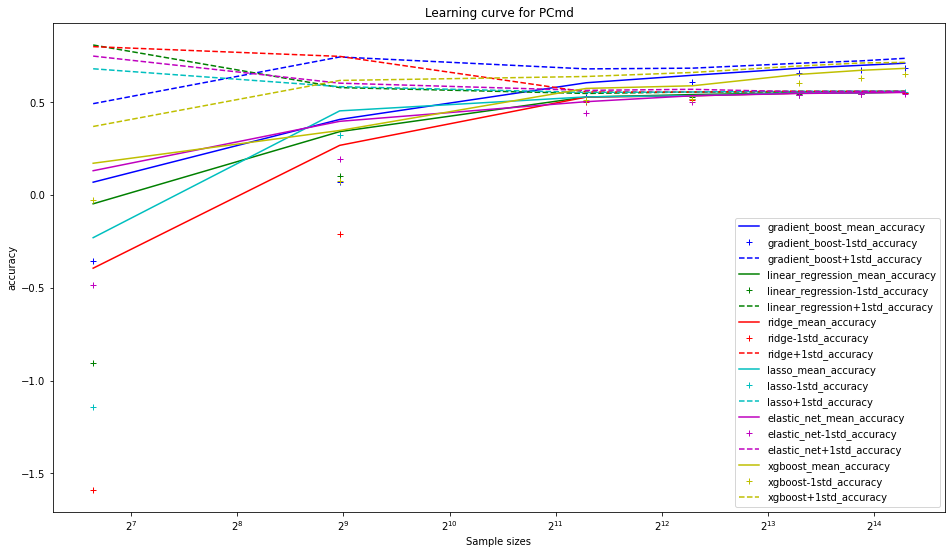

In [58]:
# Generate a plot
fig = plt.figure(figsize=(16, 9))
colors_list = ['b', 'g', 'r', 'c', 'm', 'y']

eval_metric = 'accuracy'  # GENERALIZE TO LIST OF EVAL_METRICS_LIST
dataset = 'PCmd'
for i, model in enumerate(models_list):
#     print(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)], label='{}_mean_{}'.format(model, eval_metric), color=colors_list[i])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)] - results_df[dataset]['{}_std_{}'.format(model, eval_metric)], 'k+', label='{}-1std_{}'.format(model, eval_metric), color=colors_list[i])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)] + results_df[dataset]['{}_std_{}'.format(model, eval_metric)], 'k--', label='{}+1std_{}'.format(model, eval_metric), color=colors_list[i])

plt.title('Learning curve for {}'.format(dataset))
plt.xlabel('Sample sizes')
plt.ylabel(eval_metric)
plt.xscale('log', base=2)
plt.legend()

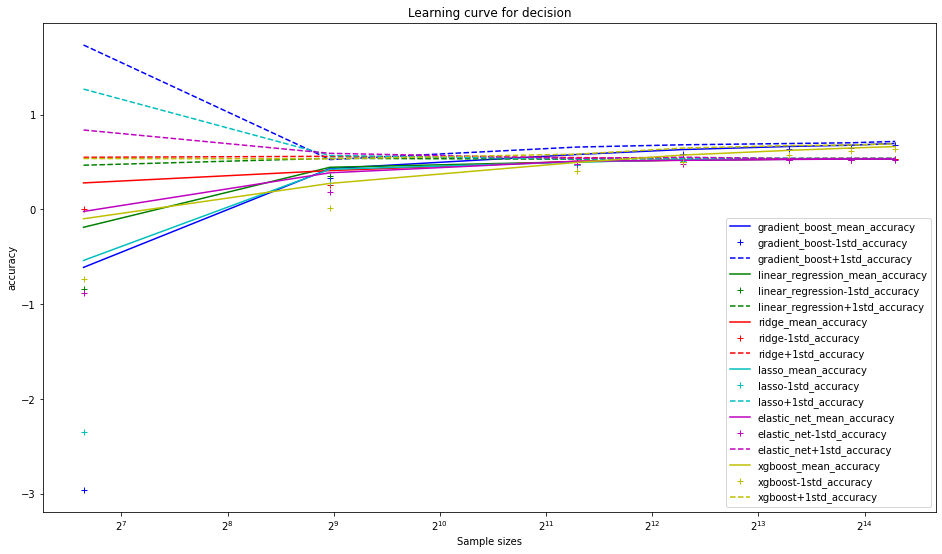

In [59]:
# Generate a plot
fig = plt.figure(figsize=(16, 9))
colors_list = ['b', 'g', 'r', 'c', 'm', 'y']

eval_metric = 'accuracy'  # GENERALIZE TO LIST OF EVAL_METRICS_LIST
dataset = 'decision'
for i, model in enumerate(models_list):
#     print(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)], label='{}_mean_{}'.format(model, eval_metric), color=colors_list[i])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)] - results_df[dataset]['{}_std_{}'.format(model, eval_metric)], 'k+', label='{}-1std_{}'.format(model, eval_metric), color=colors_list[i])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)] + results_df[dataset]['{}_std_{}'.format(model, eval_metric)], 'k--', label='{}+1std_{}'.format(model, eval_metric), color=colors_list[i])

plt.title('Learning curve for {}'.format(dataset))
plt.xlabel('Sample sizes')
plt.ylabel(eval_metric)
plt.xscale('log', base=2)
plt.legend()

In [64]:
results_df['PCmd']

,gradient_boost_mean_accuracy,gradient_boost_std_accuracy,gradient_boost_mean_mae,gradient_boost_std_mae,gradient_boost_mean_mse,gradient_boost_std_mse,linear_regression_mean_accuracy,linear_regression_std_accuracy,linear_regression_mean_mae,linear_regression_std_mae,...,elastic_net_mean_mae,elastic_net_std_mae,elastic_net_mean_mse,elastic_net_std_mse,xgboost_mean_accuracy,xgboost_std_accuracy,xgboost_mean_mae,xgboost_std_mae,xgboost_mean_mse,xgboost_std_mse
100,0.069149,0.423095,362324.772017,78029.005897,1.382166e+12,6.282285e+11,-0.047267,0.855660,559403.984695,205623.825435,...,426862.189421,152045.929724,1.290381e+12,9.171935e+11,0.171201,0.198114,348867.825625,55867.292009,1.230635e+12,2.941679e+11
500,0.407242,0.336598,273072.331332,41411.140384,8.801507e+11,4.997943e+11,0.341556,0.237267,388173.345531,89748.129890,...,335924.594212,65153.523167,8.952206e+11,3.052919e+11,0.347756,0.269641,283800.622850,29075.958238,9.684787e+11,4.003739e+11
2500,0.604950,0.074730,225544.471927,13394.572035,5.865871e+11,1.109620e+11,0.528115,0.019285,295015.714906,11799.905342,...,286967.792942,24184.993727,7.379485e+11,9.045463e+10,0.574459,0.064220,233655.339274,9215.792317,6.318602e+11,9.535637e+10
5000,0.645209,0.038378,216695.158596,7544.921330,5.268084e+11,5.698483e+10,0.541151,0.013939,281674.872292,12097.539202,...,276388.431609,13197.282272,6.905154e+11,5.143424e+10,0.588597,0.071860,224986.126584,11304.263808,6.108680e+11,1.067011e+11
10000,0.682703,0.027270,208457.554662,5063.432089,4.711353e+11,4.049220e+10,0.550803,0.004754,275099.446859,5724.510075,...,268548.791022,5999.424673,6.724743e+11,1.395360e+10,0.649795,0.045380,208946.627557,5990.339776,5.199982e+11,6.738152e+10
15000,0.698786,0.023985,202915.516328,3044.162827,4.472552e+11,3.561369e+10,0.550441,0.007684,269715.778891,3469.903952,...,265421.786009,4047.731308,6.670272e+11,1.163609e+10,0.671992,0.039459,200973.126487,5612.515820,4.870398e+11,5.859000e+10
20000,0.710272,0.026289,201087.904197,3731.733636,4.301992e+11,3.903470e+10,0.554544,0.005201,269089.903672,4201.364853,...,265367.498224,3638.741898,6.643859e+11,8.236102e+09,0.682457,0.032385,195485.231403,3587.574630,4.715010e+11,4.808638e+10


In [62]:
results_df['decision']

,gradient_boost_mean_accuracy,gradient_boost_std_accuracy,gradient_boost_mean_mae,gradient_boost_std_mae,gradient_boost_mean_mse,gradient_boost_std_mse,linear_regression_mean_accuracy,linear_regression_std_accuracy,linear_regression_mean_mae,linear_regression_std_mae,...,elastic_net_mean_mae,elastic_net_std_mae,elastic_net_mean_mse,elastic_net_std_mse,xgboost_mean_accuracy,xgboost_std_accuracy,xgboost_mean_mae,xgboost_std_mae,xgboost_mean_mse,xgboost_std_mse
100,-0.610766,2.344070,445257.000073,313904.725133,3.051010e+12,4.439987e+12,-0.188127,0.654193,702926.830039,263985.288762,...,487282.614494,222343.018812,1.934650e+12,1.626516e+12,-0.098508,0.634856,382324.011734,86939.826188,2.080724e+12,1.202504e+12
500,0.430805,0.094919,262577.976430,14977.512417,1.078133e+12,1.797902e+11,0.444551,0.094121,362474.313841,52634.161250,...,348502.578281,79592.992173,1.161954e+12,3.879855e+11,0.274532,0.259002,299304.751585,39440.535513,1.374134e+12,4.905852e+11
2500,0.579117,0.078263,234482.453120,10543.324875,7.972101e+11,1.482414e+11,0.502389,0.026816,311761.208245,29176.463331,...,296039.164818,17382.546591,9.315334e+11,5.768378e+10,0.495584,0.086956,251426.457268,13039.408770,9.554335e+11,1.647061e+11
5000,0.631252,0.050245,220733.240697,7057.060949,6.984593e+11,9.517054e+10,0.520410,0.019264,293321.341293,11462.804420,...,284728.673720,13268.606185,9.141684e+11,6.300132e+10,0.573306,0.073699,233072.095254,12302.332549,8.082161e+11,1.395956e+11
10000,0.663698,0.031125,213651.099002,4741.166906,6.370021e+11,5.895495e+10,0.530209,0.007121,283608.402481,6311.372198,...,279592.954864,7315.686836,8.964260e+11,1.746282e+10,0.622656,0.049927,215850.140358,6674.374568,7.147408e+11,9.456811e+10
15000,0.676915,0.025735,211409.439755,3555.415283,6.119667e+11,4.874644e+10,0.531274,0.005828,280384.516276,5458.019434,...,277496.218531,5490.623353,8.886802e+11,1.046920e+10,0.647202,0.032240,209803.384610,4724.679026,6.682473e+11,6.106673e+10
20000,0.695648,0.021266,209347.325161,3232.157449,5.764842e+11,4.028026e+10,0.533066,0.004820,279005.830022,4688.263111,...,277921.033936,5355.311668,8.890222e+11,9.870540e+09,0.662751,0.029290,205212.380347,4690.428059,6.387951e+11,5.547867e+10


In [61]:
results_df['selectKbest']

,gradient_boost_mean_accuracy,gradient_boost_std_accuracy,gradient_boost_mean_mae,gradient_boost_std_mae,gradient_boost_mean_mse,gradient_boost_std_mse,linear_regression_mean_accuracy,linear_regression_std_accuracy,linear_regression_mean_mae,linear_regression_std_mae,...,elastic_net_mean_mae,elastic_net_std_mae,elastic_net_mean_mse,elastic_net_std_mse,xgboost_mean_accuracy,xgboost_std_accuracy,xgboost_mean_mae,xgboost_std_mae,xgboost_mean_mse,xgboost_std_mse
100,0.256102,0.136969,338282.985516,47279.943114,1.478612e+12,2.722461e+11,-1.687716e+09,5.550547e+09,7.462510e+09,1.187144e+10,...,445887.845609,173958.414057,1.597478e+12,8.091071e+11,-0.137056,0.824219,379491.847331,95496.434428,2.260074e+12,1.638261e+12
500,0.397047,0.154372,270276.141916,23112.478205,1.198461e+12,3.068380e+11,-1.438243e+05,5.604277e+05,1.231310e+07,4.065483e+07,...,345652.968598,62521.710816,1.169479e+12,1.568565e+11,0.247785,0.410516,291471.549655,42677.534840,1.495142e+12,8.159642e+11
2500,0.536877,0.104824,235761.235057,9481.714411,9.205279e+11,2.083530e+11,4.732009e-01,2.061241e-02,2.870891e+05,1.681443e+04,...,287815.946621,10883.940160,1.019227e+12,1.830778e+10,0.509152,0.063442,248847.016544,9381.573787,9.756364e+11,1.261004e+11
5000,0.605026,0.053435,224201.690629,7018.798659,7.850721e+11,1.062112e+11,4.878445e-01,1.345963e-02,2.773765e+05,6.226159e+03,...,277568.211688,7531.482565,1.014292e+12,1.494754e+10,0.568130,0.077641,230735.816484,7907.964924,8.584069e+11,1.543227e+11
10000,0.645280,0.020949,216149.149256,4669.543418,7.050609e+11,4.163857e+10,4.969693e-01,8.192821e-03,2.743077e+05,5.395751e+03,...,274660.021884,6263.557621,9.943893e+11,8.795043e+09,0.608334,0.039260,217180.814998,6462.136461,7.784965e+11,7.803465e+10
15000,0.642786,0.031938,215635.299105,3501.627042,7.100183e+11,6.348180e+10,4.983620e-01,4.246848e-03,2.704899e+05,3.555032e+03,...,273136.780254,5359.199074,9.968228e+11,9.019658e+09,0.641767,0.033422,210731.048061,4522.874591,7.120428e+11,6.643135e+10
20000,0.659797,0.026742,213924.770833,2757.083510,6.762050e+11,5.315306e+10,4.996204e-01,3.341355e-03,2.695523e+05,3.313331e+03,...,270944.172650,2713.836847,9.941533e+11,6.568746e+09,0.652805,0.023114,205531.822645,3521.699038,6.901028e+11,4.594316e+10


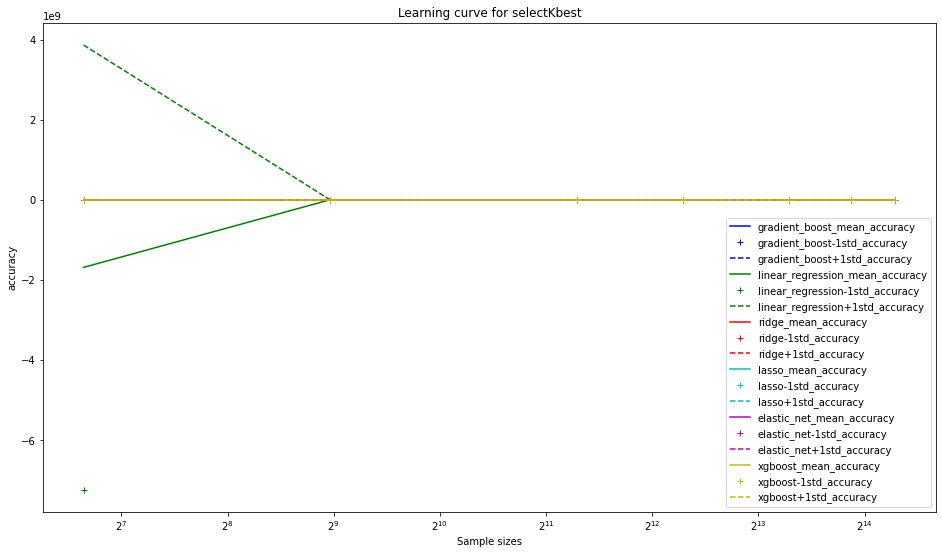

In [60]:
# Generate a plot
fig = plt.figure(figsize=(16, 9))
colors_list = ['b', 'g', 'r', 'c', 'm', 'y']

eval_metric = 'accuracy'  # GENERALIZE TO LIST OF EVAL_METRICS_LIST
dataset = 'selectKbest'
for i, model in enumerate(models_list):
#     print(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)], label='{}_mean_{}'.format(model, eval_metric), color=colors_list[i])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)] - results_df[dataset]['{}_std_{}'.format(model, eval_metric)], 'k+', label='{}-1std_{}'.format(model, eval_metric), color=colors_list[i])
    plt.plot(results_df[dataset]['{}_mean_{}'.format(model, eval_metric)] + results_df[dataset]['{}_std_{}'.format(model, eval_metric)], 'k--', label='{}+1std_{}'.format(model, eval_metric), color=colors_list[i])

plt.title('Learning curve for {}'.format(dataset))
plt.xlabel('Sample sizes')
plt.ylabel(eval_metric)
plt.xscale('log', base=2)
plt.legend()